In [2]:

# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = sm.datasets.fair.load_pandas().data   #import data from sm, name of dataset is fair, load into pandas dataframe

In [4]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [6]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [14]:
data['Had_Affair'].dtype  #datatype of the column

dtype('int64')

In [8]:
data['occupation'].unique()   #get all the unique values from a column

array([2., 3., 5., 4., 1., 6.])

In [9]:
data['occupation_husb'].unique()

array([5., 4., 3., 2., 6., 1.])

In [10]:
def affair_check(x):
    if x == 0:
        return 0
    else:
        return 1   #creating a function which returns 0 when affairs column in the dataset is 0 and 1 when affairs is not 0

In [11]:
data['Had_Affair'] = data['affairs'].apply(affair_check)  #creating extra column naming Had_Affair and applying the affair_check function

In [12]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [13]:
data.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [15]:
data.groupby(['Had_Affair']).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


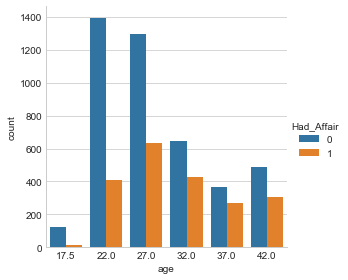

In [16]:
sns.factorplot('age', data=data, hue = 'Had_Affair', kind = 'count')

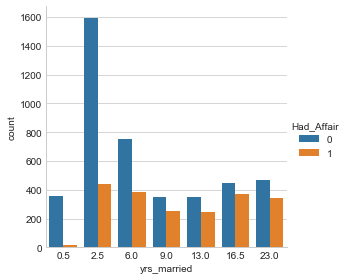

In [17]:
sns.factorplot('yrs_married', data=data, hue = 'Had_Affair', kind = 'count')

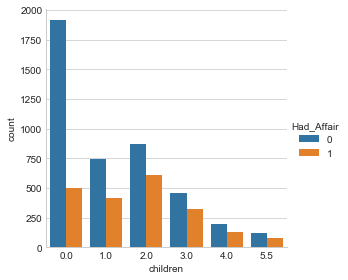

In [18]:
sns.factorplot('children', data=data, hue = 'Had_Affair', kind = 'count')

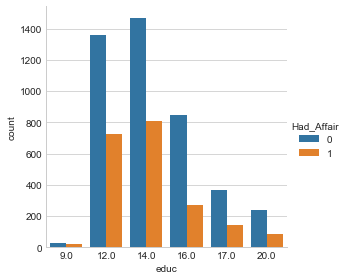

In [19]:
sns.factorplot('educ', data=data, hue = 'Had_Affair', kind = 'count')

In [20]:
occ_dummies = pd.get_dummies(data['occupation'])   #creating dummy variables for categorical variables

In [21]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [22]:
occ_dummies.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']   #giving names to columns

In [23]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [24]:
occhusb_dummies = pd.get_dummies(data['occupation_husb'])

In [25]:
occhusb_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [26]:
occhusb_dummies.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

In [27]:
occhusb_dummies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


# Dropping columns 'occupation' and 'Had_Affair' and creating a X dataframe consisting of all the independent variables

In [28]:
X = data.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis = 1)  

In [29]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [30]:
dummies = pd.concat([occ_dummies, occhusb_dummies], axis = 1)  #concatenating the occupation dataframes

In [31]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [32]:
X = pd.concat([X, dummies], axis =1)

In [33]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [34]:
Y = data.Had_Affair

In [35]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [36]:
X = X.drop(['occ1', 'hocc1'], axis = 1)  #dropping the occ1 and hocc1 to avoid multicollinearity
                                            #otherwise, the model will be 100% accurate which is highly unlikely

In [37]:
X = X.drop('affairs', axis =1)   #dropping the affairs column coz it is similar to the Column 'Had_Affair' which is in Y dataset

In [38]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [39]:
Y.head()  #in order to read by scikit learn we need this as a 1-D array

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [40]:
Y = np.ravel(Y)  #ravel is a numpy function which converts into 1-D array

In [41]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
Logistic_Model = LogisticRegression(fit_intercept = True)


In [43]:
SM_Logistic_Model = sm.Logit(Y, X)

In [44]:
result=SM_Logistic_Model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.544549
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6350
Method:                           MLE   Df Model:                           15
Date:                Thu, 15 Nov 2018   Pseudo R-squ.:                  0.1339
Time:                        17:31:23   Log-Likelihood:                -3466.6
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                5.253e-219
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage    -0.6859      0.031    -22.092      0.000      -0.747      -0.625
age              -0.

In [45]:
Logistic_Model.fit(X, Y)    #fitting the data into the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
Logistic_Model.score(X, Y)   #check the accuracy of the model

0.7258875274897895

In [47]:
class_predict1 = Logistic_Model.predict(X)

In [48]:
class_predict1[808]

1

In [49]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [50]:
Y.mean()   #32% of women had an affair

0.3224945020420987

# Getting the co-effiecients of all the independent variables


In [51]:
data_coeff = pd.DataFrame(list(zip(X.columns, np.transpose(Logistic_Model.coef_))))   #get the co-efficients of all variables

In [52]:
data_coeff

,0,1
0,rate_marriage,[-0.6978993837681895]
1,age,[-0.0563584466885267]
2,yrs_married,[0.10389877844065028]
3,children,[0.018239469352837125]
4,religious,[-0.36852857639786496]
5,educ,[0.008572721211643614]
6,occ2,[0.2983730982111432]
7,occ3,[0.6098252258387517]
8,occ4,[0.3485340065114062]
9,occ5,[0.9447752882919558]


In [53]:
Logistic_Model.coef_

array([[-0.69789938, -0.05635845,  0.10389878,  0.01823947, -0.36852858,
         0.00857272,  0.2983731 ,  0.60982523,  0.34853401,  0.94477529,
         0.9173068 ,  0.22008797,  0.32531693,  0.1892608 ,  0.21279165,
         0.21555256]])

# split the data into train and test sets 

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [55]:
Logistic_Model2 = LogisticRegression(fit_intercept = True)

In [56]:
Logistic_Model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
class_predict = Logistic_Model2.predict(X_test)

In [58]:
class_predict[808]

0

In [59]:
Logistic_Model2.coef_

array([[-0.7041805 , -0.06069539,  0.10670538,  0.02098546, -0.38444489,
         0.01985351,  0.35016505,  0.56599352,  0.28258837,  0.85777714,
         0.72249596,  0.23409743,  0.2934902 ,  0.13631044,  0.20055303,
         0.14181269]])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print (accuracy_score(Y_test, class_predict))

0.7229899497487438


In [62]:
data.iloc[[808]]     #to extract a single specific row from the dataset

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
808,3.0,42.0,23.0,2.0,2.0,14.0,3.0,5.0,0.852174,1


In [63]:
data.iloc[[2230]]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
2230,5.0,32.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0


In [64]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
regressor_OLS = sm.OLS(Y_train, X_train).fit()
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     59.03
Date:                Thu, 15 Nov 2018   Prob (F-statistic):          2.44e-173
Time:                        17:31:51   Log-Likelihood:                -2713.0
No. Observations:                4774   AIC:                             5460.
Df Residuals:                    4757   BIC:                             5570.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1434      0.109     10.465      0.000       0.929       1.358
rate_marriage    -0.1459      0.007    -22.075      0.000      -0.159      -0.133
age              -0.0122      0.002     -5.753      0.000      -0.016      -0.008
yrs_married       0.0211      0.002      9.239      0.000       0.017       0.026
children          0.0019      0.007      0.270      0.787      -0.012       0.016
religious        -0.0707      0.007     -9.782      0.000      -0.085      -0.057
educ              0.0015      0.004      0.417      0.677      -0.006       0.009
occ2              0.0419      0.082      0.513      0.608      -0.118       0.202
occ3              0.0830      0.080      1.032      0.302      -0.075       0.241
occ4              0.0396      0.081      0.492      0.623      -0.118       0.198
occ5              0.1439      0.082      1.756      0.079      -0.017       0.304
occ6              0.1280      0.095      1.352      0.177      -0.058       0.314
hocc2             0.0283      0.036      0.782      0.434      -0.043       0.099
hocc3             0.0391      0.040      0.980      0.327      -0.039       0.117
hocc4             0.0106      0.035      0.304      0.761      -0.058       0.079
hocc5             0.0230      0.035      0.652      0.515      -0.046       0.092
hocc6             0.0145      0.040      0.363      0.717      -0.064       0.093
==============================================================================
Omnibus:                      890.582   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.856
Skew:                           0.595   Prob(JB):                     6.84e-97
Kurtosis:                       2.101   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
regressor_OLSTest = sm.OLS(Y_test, X_test).fit()
regressor_OLSTest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     20.15
Date:                Thu, 15 Nov 2018   Prob (F-statistic):           3.36e-53
Time:                        17:31:55   Log-Likelihood:                -898.02
No. Observations:                1592   AIC:                             1830.
Df Residuals:                    1575   BIC:                             1921.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9379      0.176      5.315      0.000       0.592       1.284
rate_marriage    -0.1379      0.011    -12.303      0.000      -0.160      -0.116
age              -0.0067      0.004     -1.814      0.070      -0.014       0.001
yrs_married       0.0167      0.004      4.221      0.000       0.009       0.024
children          0.0032      0.012      0.263      0.793      -0.021       0.027
religious        -0.0571      0.012     -4.646      0.000      -0.081      -0.033
educ             -0.0058      0.007     -0.885      0.377      -0.019       0.007
occ2              0.0545      0.130      0.419      0.675      -0.200       0.309
occ3              0.1656      0.127      1.302      0.193      -0.084       0.415
occ4              0.1353      0.127      1.063      0.288      -0.114       0.385
occ5              0.2624      0.130      2.025      0.043       0.008       0.517
occ6              0.2979      0.147      2.028      0.043       0.010       0.586
hocc2             0.0350      0.063      0.557      0.577      -0.088       0.158
hocc3             0.0747      0.072      1.043      0.297      -0.066       0.215
hocc4             0.0630      0.061      1.035      0.301      -0.056       0.182
hocc5             0.0417      0.062      0.674      0.500      -0.080       0.163
hocc6             0.0826      0.069      1.192      0.233      -0.053       0.219
==============================================================================
Omnibus:                      260.819   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.283
Skew:                           0.628   Prob(JB):                     5.19e-34
Kurtosis:                       2.144   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
data.to_csv('UdemyLogistic.csv')   #download dataset 'data' into your system 

In [67]:
X.to_csv('AffairLogistic.csv') #download dataset 'X' into your system 